In [54]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [55]:
df = sns.load_dataset('titanic')

In [56]:
df_linear = df[["age","fare"]]

In [57]:
df_linear.fillna(value=df_linear.mean(), inplace =True)

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_12528\990536547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.fillna(value=df_linear.mean(), inplace =True)


In [58]:
df_linear.isnull().sum()

age     0
fare    0
dtype: int64

In [59]:
df_linear

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


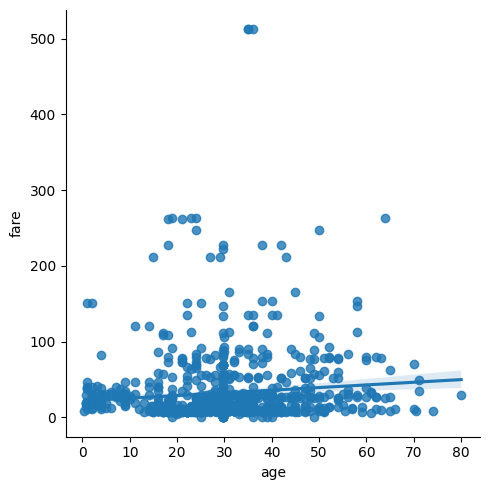

In [60]:
sns.lmplot(data=df_linear, x ='age' , y='fare')

# removing outliers

<Axes: ylabel='age'>

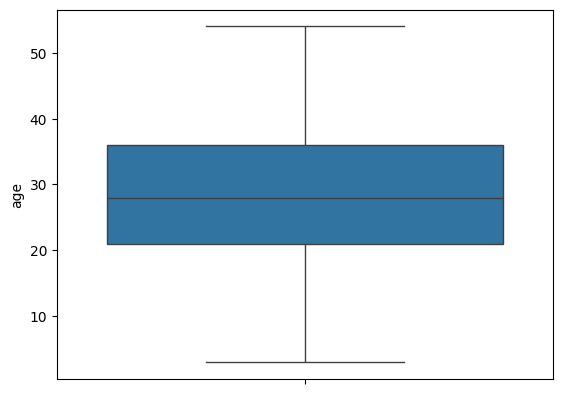

In [63]:
# finding outliesrs using  boxplot
sns.boxplot(data=df_linear,y='age')
   

In [62]:
# removing outliers  from  age colume 
# removing outliers
Q1 = df_linear['age'].quantile(0.25)
Q3= df_linear['age'].quantile(0.75)
IQR = Q3-Q1
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

df_linear = df_linear[(df['age']>lower_bound ) & (df['age'] <upper_bound)]
# this remove the just age colume outliers

<Axes: ylabel='fare'>

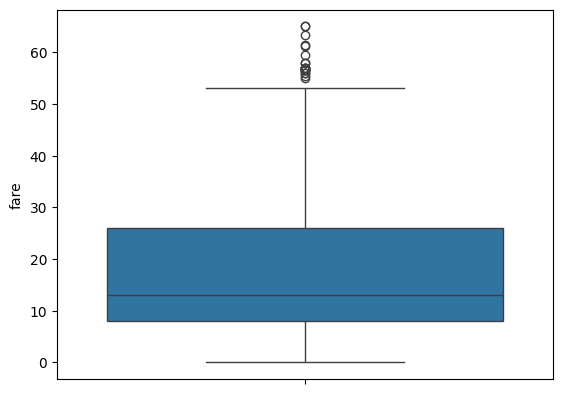

In [66]:
sns.boxplot(data=df_linear,y='fare')

In [65]:
# removing outliers  from  fare colume 
# removing outliers
Q1 = df_linear['fare'].quantile(0.25)
Q3= df_linear['fare'].quantile(0.75)
IQR = Q3-Q1
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

df_linear = df_linear[(df_linear['fare']>lower_bound ) & (df_linear['fare'] <upper_bound)]

In [67]:
# simple linear regression
# taking feature from data
X = df_linear[['age']] # always take features in 2D araay
y= df_linear['fare']

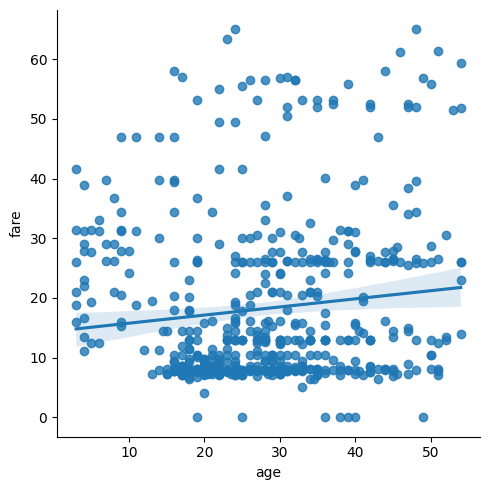

In [68]:
sns.lmplot(data=df_linear,x='age',y='fare')

So we have two colume one is age and other one is fare  
 we are going train a modal  that tell  us the fare according to the age

In [69]:
#use Sciket librar
#whenever we use ml library we need to use train_test_split it split the data 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
# simple linear regression
# taking feature from data
X = df_linear[['age']] # always take features in 2D araay
y= df_linear['fare']

In [71]:
# we take model
model = LinearRegression()

In [72]:
# now fit data to model and train it'
model.fit(X,y)

LinearRegression()

In [73]:
model.predict([[25]]) # here we want to check that 25 year poeple fare 

c:\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.81085616])

it is telling that when age is 25 then we need to collect 14.93 pounds 

# we find that our model is working correct of not how much accuracy is fine

In [82]:
# evaluating model
# we are going slipt data into two parts one is traing(80%) and other one is testing(20%)
X_train,X_test,y_train,y_test = train_test_split (X,y,train_size=0.8)

In [83]:
model.fit(X_train,y_train)


LinearRegression()

In [84]:
prediction = model.predict(X_test)
expected = y_test

In [85]:
prediction

array([18.2489892 , 17.77440213, 20.62192452, 17.96423696, 17.77440213,
       17.48964989, 19.29308074, 18.91341109, 17.86931954, 17.58456731,
       18.53374144, 17.77440213, 18.05915437, 17.77440213, 17.67948472,
       17.20489765, 18.53374144, 18.81849367, 18.2489892 , 18.34390661,
       19.19816333, 15.78113646, 19.67275039, 17.58456731, 17.39473248,
       20.14733746, 16.25572352, 15.87605387, 18.34390661, 17.96423696,
       19.29308074, 18.05915437, 17.29981507, 18.34390661, 17.58456731,
       17.48964989, 16.25572352, 17.20489765, 17.01506283, 16.0658887 ,
       19.7676678 , 17.39473248, 19.48291557, 17.10998024, 18.91341109,
       18.53374144, 18.81849367, 17.86931954, 20.05242004, 17.29981507,
       18.62865885, 18.2489892 , 18.05915437, 17.29981507, 16.54047576,
       16.16080611, 20.62192452, 18.91341109, 18.43882402, 20.24225487,
       19.19816333, 18.81849367, 18.34390661, 18.2489892 , 17.67948472,
       17.67948472, 18.81849367, 17.58456731, 18.15407178, 18.62

In [86]:
expected

242    10.5000
514     7.4958
249    26.0000
889    30.0000
127     7.1417
        ...   
539    49.5000
283     8.0500
125    11.2417
822     0.0000
231     7.7750
Name: fare, Length: 112, dtype: float64

<Axes: ylabel='fare'>

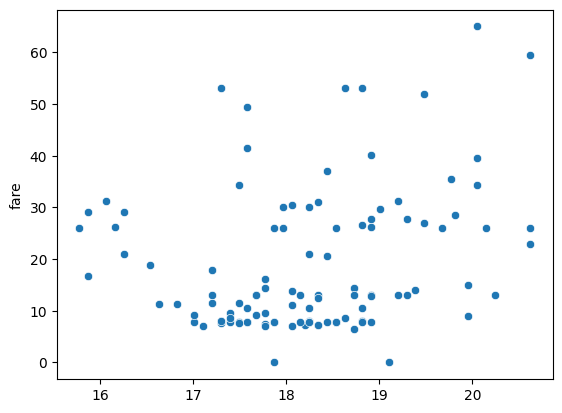

In [87]:
# making scatter plot
sns.scatterplot(x=prediction,y=expected)

it is a linear regression and we see there is no straight  line so we can say that model is 
 not working accurately

In the scikit-learn library, the score method is a convenient way to evaluate the performance of a trained model on test data. The specific meaning of the score method depends on the type of model and the task (e.g., classification, regression).

Classification Accuracy
For classification tasks, the score method returns the accuracy, which is the fraction of correctly classified instances.

Accuracy Range: The accuracy score ranges from 0 to 1, where 1 means all predictions are correct, and 0 means none are correct.

Regression  Score 
0.9 or 90%: Indicates the model explains 90% of the variance in the response variable, which is usually considered very good.
0.7 or 70%: Often acceptable, depending on the context and field of application.
0.0 or 0%: The model does not explain any of the variance in the response variable.
Negative values: The model performs worse than the baseline mean prediction.

In [88]:
model.score(X_test,y_test) # out is 0.011800 its mean it is not working good 

0.033078092698765604

 # Regression Metrics

Mean Absolute Error (MAE):
Mean Squared Error (MSE):
Root Mean Squared Error (RMSE): in resarch mostly us use  this this mathod to find RMSE
R^2 Score Calculation and Interpretation:

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, prediction )
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared=False)
r2 = r2_score(y_test, prediction)

print("MAE", mae)
print("MSE",mse)
print("RMSE",rmse)
print("R^2",r2)

MAE 10.753001340605307
MSE 175.92942466150276
RMSE 13.263838986564288
R^2 0.033078092698765604


c:\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
